外交外交政策中国美专家畅想联合日印澳共同遏制中国被泼了冷水西奇乌克兰马达无视中资股东抗议乌克兰将把马达西奇公司收归国有高德胜输入性通货膨胀美国放水万亿美元中国如何抵御输入性通胀美国务卿布林肯承诺邀台出席所谓民主峰会缅甸昂山素季美国政府缅甸军方向西方服软称要远离中国事情没那么简单武契奇塞尔维亚疫苗武契奇塞尔维亚将建厂生产中国疫苗拜登接种美国总统拜登首次黄金时段演讲加速接种疫苗家人朋友月日前也许能一起聚会纽约州科莫州长美国纽约州州长科莫面临弹劾调查拜登华为美国还在打压外媒拜登政府增加对华为供应商新限制美商务部拒回应称是机密缅甸昂山素季缅甸混乱局势仍在持续缅军方指控昂山素季收受贿赂德国大使馆燃烧瓶办公楼中国驻德国使馆遭袭办公楼一侧被抛掷燃烧瓶嫌疑人已被当场抓获瑞典女王储维多利亚夫妇确诊感染新冠病毒美国防部航行自由报告挑战个国家和地区主张涉中国最多消息人士透露特朗普女婿库什纳计划写书讲述白宫经历轻武器枪弹自动步枪讲武谈兵｜提升高原作战能力印军轻武器重归中口径美国戴维森五角大楼美国印太司令国会作证中国正加速在世界舞台取代美国台湾省杰尼索夫驻华大使俄驻华大使还没去过台湾省愿坐高铁去英国卢卡斯香港露易丝卢卡斯英国敞开怀抱欢迎香港移民阻碍多着呢唐纳德特朗普大选上诉美最高法驳回特朗普最后一项关于年大选的上诉种族灭绝王毅印第安人参考快评西方诬蔑中国搞种族灭绝自己的黑历史忘了吗印度美防长国防部长印媒美防长计划下周访问印度深化两国军事合作沙特无人机石油沙特石油重镇港口遭无人机袭击或将影响世界能源供应阿富汗国务卿联合国美国国务卿美军驻阿富汗部队将于月日撤离联合国接手后续维和事宜美国防部公布保卫国家优先事项应对中国挑战仅次于抗击疫情菠萝台湾美国美国在台协会作秀挺台湾菠萝美国专家都吐槽没用且幼稚口罩美国艾滋病美国多州相继解除口罩强制令议员发出惊人言论艾滋病流行时都没戴口罩为啥防新冠要戴政府工作报告参议院中美同时办大事中国小时搞定美国耗了个小时军费预算公布后CNN中国已建成世界最大规模海军德士兵强行给痴呆老人注射疫苗胡锡进呼吁西媒调查英国教授预警韩国或将成为全球首个消失的国家拜登唐纳德特朗普白宫特朗普拜登领导下美墨边境将变更危险更失控美国务卿布林肯最新演讲谈中美关系这些倒退迹象值得警惕谢长廷台湾美国断交年后美驻日大使首次和台代表约饭还发推特人权华春莹澳大利亚澳大利亚SBS电视台跳了出来！以所谓人权

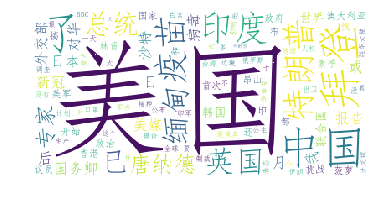

In [9]:
# please pip install PIL & pip install jieba if you don't have
# to create the correct wordcloud image， you have to create a temp image in the path such as C:\Users\dell\Desktop\下载.jpg and input it in the create function
import requests
from requests.exceptions import RequestException
import json
import jieba
import re
from os import path
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

headers = {
'Referer': 'http://news.163.com/world/',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36',
}

def get_json(url):
	try:
		response = requests.get(url,headers=headers)
		if response.status_code == 200:
			return response.content.decode('gbk')
		else :
			return None
	except RequestException as e:
		return None

def get_info(json_data,wordcloud_list):
	real_json_content = re.findall('data_callback\((.*?)\)',json_data,re.S)
	content = json.loads(real_json_content[0])
	# print(content) 测试成功
	for obj in content:
		title = obj['title']
		keywords = obj['keywords']
		keyword_list = list()
		try:
			for keyword in keywords:
				keyword_list.append(keyword['keyname'])
		except:
			pass
		# print(title)
		# print(keyword_list)
		wordcloud_list.append(keyword_list + list(title))

def create(imgFile, text):
    
    
	im = Image.open(imgFile)
	w, h = im.size
	# 创建wordcloud对象
	wc = WordCloud(
		r'C:\windows\fonts\simfang.ttf', 
		background_color='white', font_step=3,min_font_size = 4,
		random_state=False, prefer_horizontal=0.9,max_font_size = 150,
	)
	
	t = wc.generate(text)
	t = t.to_image()
	for w1 in range(w):
		for h1 in range(h):
			if im.getpixel((w1, h1))[:3] == (255, 255, 255):
				t.putpixel((w1, h1), (255, 255, 255))
	plt.imshow(t)
	plt.axis("off")
	plt.show()
	t.save(r'C:\Users\dell\Desktop\下载.jpg')

if __name__ == '__main__':
	wordcloud_list = list()
	urls = ('http://temp.163.com/special/00804KVA/cm_guoji.js?callback=data_callback','http://temp.163.com/special/00804KVA/cm_guoji_02.js?callback=data_callback')
	for url in urls:
		json_data = get_json(url)
		get_info(json_data,wordcloud_list)
	wordcloud_list_data = [j for i in wordcloud_list for j in i]# 列表推导式实现二维列表的平铺变为一维列表
	content = ''.join(wordcloud_list_data)# 一维列表才可以用join方法进行合并方成一个字符串来进行jieba分词
	# print(finall) 测试成功

	content = re.sub('[0-9]|[!@#$%^&*()_+=";:\',.；‘，?《》<>。？“ ”：~·\"!＂]','',content)
	print(content)

	words = jieba.lcut(content)
	counts = dict()
	stopwords = ('被','是','将','在','美','中','人','警察','的','宣布','与','回应','前','年','会','女子','称','为')
	for word in words:
		if word in stopwords:
			pass
		else:
			counts[word] = counts.get(word,0) + 1
	items = list(counts.items())
	items.sort(key=lambda x: x[1], reverse=True)
	mylist = list()
	for i in range(100):
		word, count = items[i]
		mylist.append(word)
	text = ' '.join(mylist)
	# print(text) 测试成功
	create(r'C:\Users\dell\Desktop\下载.jpg',text)
	
